Plot the accuracy results for nice visualization. Just visual, the data comes from the csv file./

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
distinct_aug = ["r", "g","flr", "bra", "cropandpad"]

In [21]:
df = pd.read_csv("log_new_errors (1).txt", names = ["iteration", "n", "aug", "epsilon", "accuracy"])

In [3]:
with open("log_new_errors.txt", "r") as f:
    line = (f.readline())
    data = {}
    k = 0
    while line:
        items = line.split(",")
        iteration
        n = items[0]
        augs = ""
        cur_aug = items[1]
        i = 1
        while cur_aug in distinct_aug:
            augs += cur_aug+","
            i += 1
            cur_aug = items[i]
        epsilon = items[i]
        accuracy = items[i+1][:-1]
        data[k] = {"n": n, "augs": augs[:-1], "epsilon": epsilon, "accuracy": accuracy}
        k += 1
        line = f.readline()

In [22]:
df["accuracy"] = df["accuracy"]*100

In [28]:
table_acc = np.around(df.groupby(["n", "aug", "epsilon"]).mean()["accuracy"],2)

In [30]:
type(table_acc)

pandas.core.series.Series

In [35]:
table_acc.astype(str)

n   aug         epsilon
1   bra         0.2        42.48
    cropandpad  0.2        50.92
    flr         0.2        46.51
    g           0.2        34.09
    r           0.2        49.67
2   bra         0.2        43.76
    cropandpad  0.2         52.8
    flr         0.2        46.99
    g           0.2        35.28
    r           0.2        50.37
5   bra         0.2        44.35
    cropandpad  0.2        54.35
    flr         0.2        47.07
    g           0.2        36.07
    r           0.2        50.47
10  bra         0.2        44.69
    cropandpad  0.2        55.14
    flr         0.2        47.12
    g           0.2        36.33
    r           0.2        50.53
20  bra         0.2        44.74
    cropandpad  0.2        55.54
    flr         0.2        47.19
    g           0.2        36.67
    r           0.2        50.69
Name: accuracy, dtype: object

In [45]:
pd.DataFrame(table_acc.astype(str).str.cat(np.around(df.groupby(["n", "aug", "epsilon"]).sem()["accuracy"],2).astype(str), sep = "\%$\pm$ ")).unstack(1).to_csv("accuracies_with_std.csv")

In [4]:
df = pd.DataFrame.from_dict(data, orient = "index")

In [5]:
df_all = df[~df.duplicated(["n","epsilon","augs"])].copy()

In [6]:
df_all["epsilon"] = df_all["epsilon"].astype(float)
df_all["accuracy"] = df_all["accuracy"].astype(float)
df_all["n"] = df_all["n"].astype(int)

In [7]:
baseline_accuracy = 0.43493333333333334

In [8]:
table = {}

In [9]:
pd.unique(df_all["n"])

array([ 1,  2,  5, 10, 20])

In [14]:
for n in pd.unique(df_all["n"]):
    for aug in pd.unique(df_all["augs"])[:5]:
        table[aug] = np.round(df_all[(df_all["epsilon"] == 0.2)&(df_all["augs"] == aug)]["accuracy"].values*10000)/100

In [15]:
pd.DataFrame.from_dict(table)

,r,g,flr,bra,cropandpad
0,49.23,34.35,46.61,42.28,51.01
1,50.69,35.71,47.13,44.49,52.39
2,50.19,36.19,47.16,44.31,54.23
3,50.69,36.39,47.25,44.60,54.95
4,50.68,36.85,47.23,44.99,55.16


In [16]:
table_full = {}

In [17]:
for n in pd.unique(df_all["n"]):
    table_full[n] = np.round(df_all[(df_all["epsilon"] == 0.2)&(df_all["n"] == n)]["accuracy"].values*10000)/100

In [20]:
df_full = pd.DataFrame.from_dict(table_full)

In [22]:
df_full.index = df_all[(df_all["epsilon"] == 0.2)&(df_all["n"] == 1)]["augs"]

In [24]:
df_full.to_csv("full_table.csv")

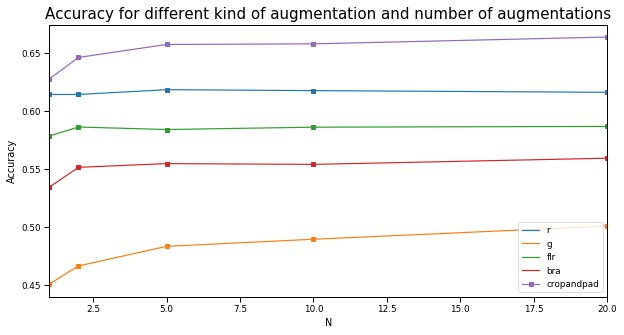

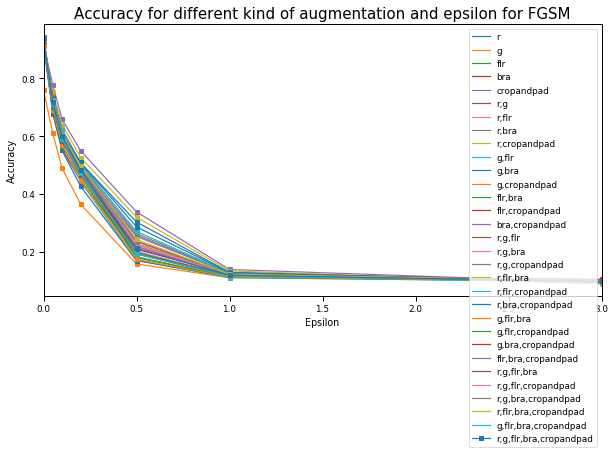

In [66]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Accuracy for different kind of augmentation and number of augmentations", fontsize=15)
for aug in pd.unique(df_all["augs"])[:5]:
    df_all[(df_all["epsilon"] == 0.1)&(df_all["augs"] == aug)].plot(x = "n", y = "accuracy", ax = ax, label=aug, style = "-s")
ax.set_ylabel("Accuracy")
ax.set_xlabel("N")
plt.savefig("accuracyplot.png",bbox_inches='tight',dpi=100)

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Accuracy for different kind of augmentation and epsilon for FGSM", fontsize=15)
for aug in pd.unique(df_all["augs"]):
    df_all[(df_all["n"] == 10)&(df_all["augs"] == aug)].plot(x = "epsilon", y = "accuracy", ax = ax, label=aug, style = "-s")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epsilon")
plt.savefig("accuracyplot.png",bbox_inches='tight',dpi=100)



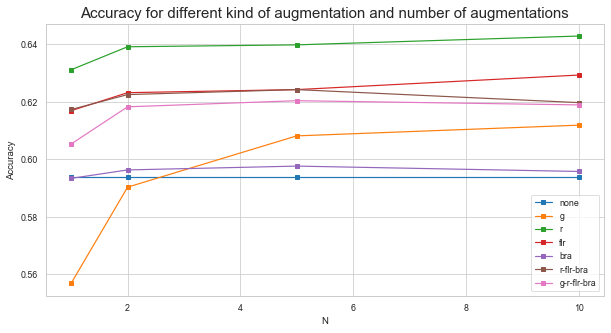

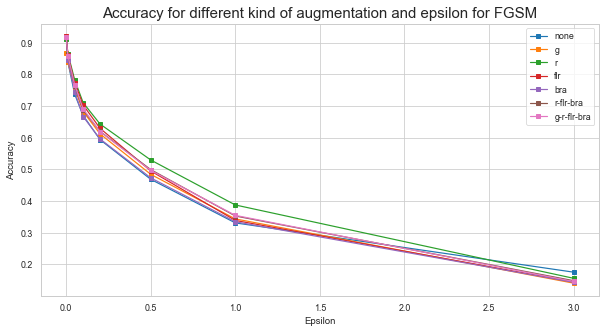

In [31]:
df = pd.read_csv("log.csv", header = 0)


sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Accuracy for different kind of augmentation and number of augmentations", fontsize=15)
for aug in pd.unique(df["augs"]):
    df[(df["epsilon"] == 0.2)&(df["augs"] == aug)].plot(x = "n", y = "accuracy", ax = ax, label=aug, style = "-s")
ax.set_ylabel("Accuracy")
ax.set_xlabel("N")
plt.savefig("accuracyplot.png",bbox_inches='tight',dpi=100)

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Accuracy for different kind of augmentation and epsilon for FGSM", fontsize=15)
for aug in pd.unique(df["augs"]):
    df[(df["n"] == 10)&(df["augs"] == aug)].plot(x = "epsilon", y = "accuracy", ax = ax, label=aug, style = "-s")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epsilon")
plt.savefig("accuracyplot.png",bbox_inches='tight',dpi=100)



Code to plot things in the same figure

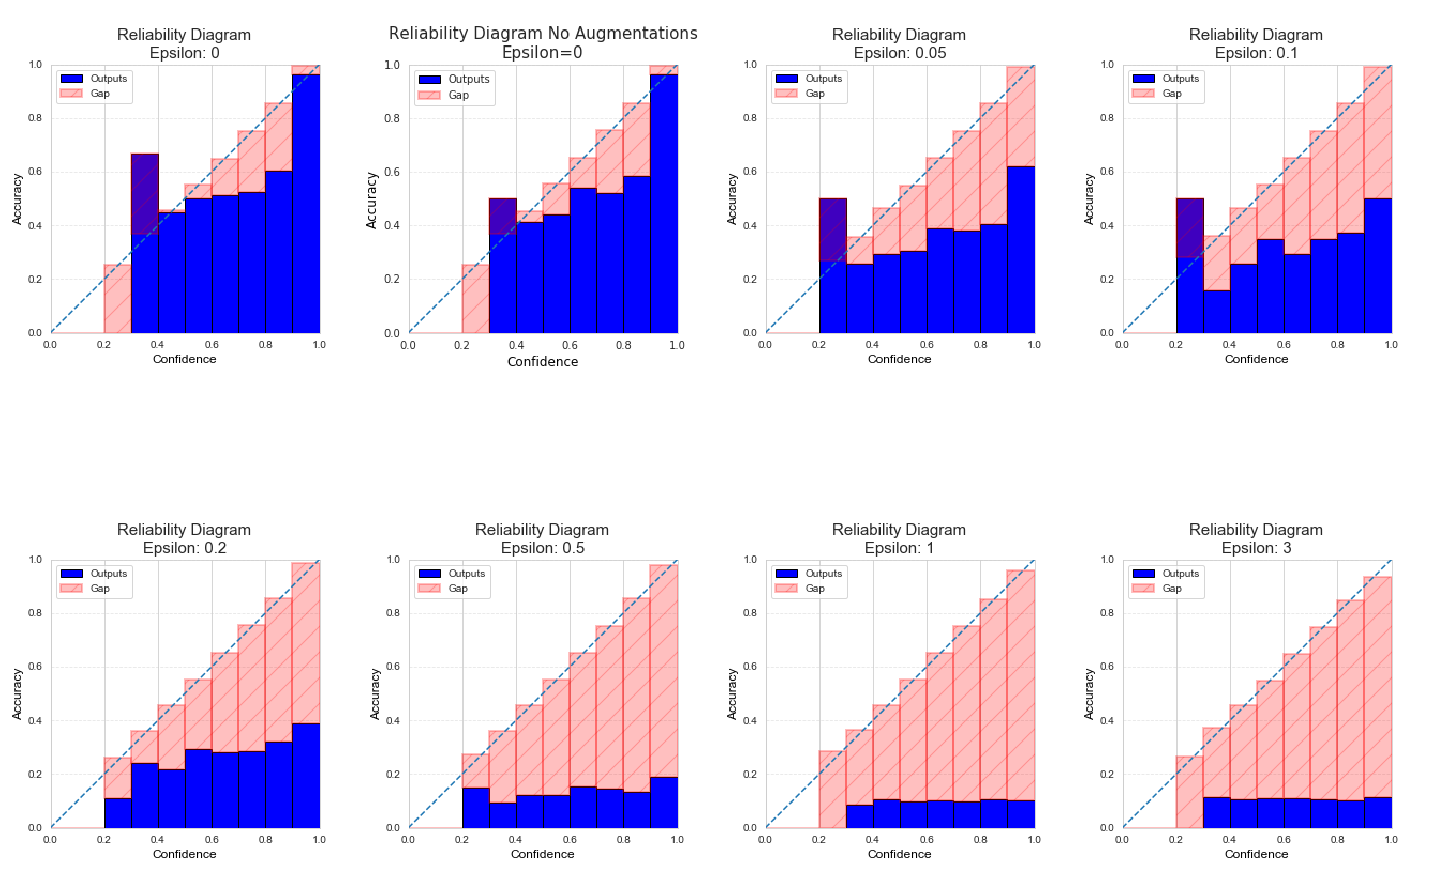

In [6]:
%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,20
n_img=len(figures)
row=0
fig, ax = plt.subplots(2,4)
for i in range(n_img):
    # read images
    img = mpimg.imread("figures/"+"reliability_diagram_"+str(i)+".png")
    if i==4:
        row+=1
    if i>=4:
        i-=4
    # display images
    ax[row,i].axis('off')
    ax[row,i].imshow(img);
    plt.tight_layout()


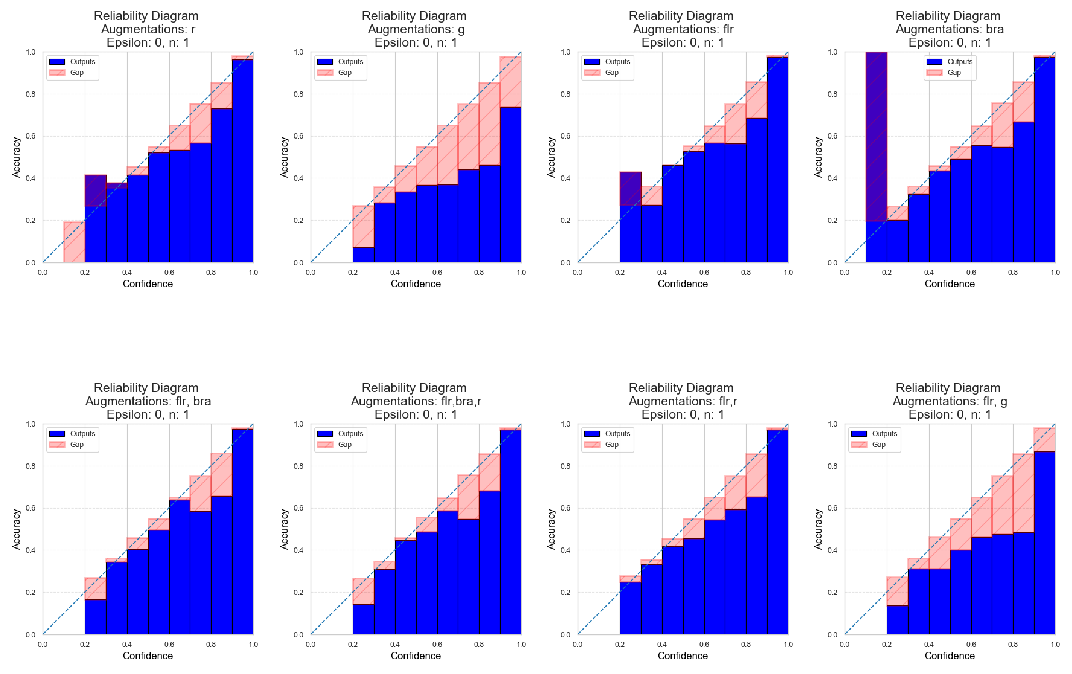

In [42]:
%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 15 ,15
n_img=len(figures)
row=0
fig, ax = plt.subplots(2,4)
for i in range(n_img):
    # read images
    img = mpimg.imread("figures/"+"reliability_diagram_"+str(i)+"aug"+".png")
    if i==4:
        row+=1
    if i>=4:
        i-=4
    # display images
    ax[row,i].axis('off')
    ax[row,i].imshow(img);
    plt.tight_layout()


In [ ]:
### OLD METHOD
def plot_reliability(predicted_probs, real_labels, title="Realiability plot", figsize=(7, 7)):
    sns.plotting_context("paper")
    sns.set_style("whitegrid")
    buckets = list(np.linspace(0, 1, 11))
    probabilities = np.array([])  # this is the predicted confidence
    predicted_labels = np.array([])
    correct_labels = np.array([])
    for i, probs in enumerate(predicted_probs):
        probabilities = np.hstack((probabilities, probs.max(1, keepdim=True)[0].exp().squeeze().numpy()))
        predicted_labels = np.hstack((predicted_labels, probs.max(1, keepdim=True)[1].squeeze().numpy()))
        correct_labels = np.hstack((correct_labels, real_labels[i].cpu().numpy()))

    bin_index = np.digitize(probabilities, buckets) - 1

    accuracy = np.zeros((len(buckets) - 1, 1))
    confidence = np.zeros((len(buckets) - 1, 1))
    size_bins = np.zeros((len(buckets) - 1, 1))

    for i, prob in enumerate(probabilities):
        size_bins[bin_index[i]] += 1
        confidence[bin_index[i]] += prob
        if predicted_labels[i] == correct_labels[i]:
            accuracy[bin_index[i]] += 1

    accuracy = accuracy / size_bins
    confidence = confidence / size_bins
    straight_line = [0, 1]

    f, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.plot(confidence, accuracy)
    ax.plot(straight_line, straight_line)
    ax.set_xlabel("Confidence")
    ax.set_ylabel("Accuracy")